Цель практической работы


Решить задачу разметки датасета и проанализировать корректность проведённой разметки.


Что нужно сделать
Вам предстоит выполнить задачу детекции как отсутствия спецовки (специальной одежды), так и нарушения ношения СИЗ, как было показано в видеоуроках.

Выполните следующие шаги:

1. Подумайте, какая это будет задача: сегментации, детекции или классификации. Напишите свои рассуждения.
2. Импортируйте все необходимые библиотеки.
3. У вас уже есть фото и видео. Можете использовать всё, кроме одного тестового, где будет видно как отсутствие спецовки, так и отсутствие СИЗ у рабочего.
4. Загрузите данные в сервис, например Roboflow, выполните разметку и аугментацию. Аугментацию вы можете выполнить отдельно с помощью кода.
5. Оцените корректность проведённой разметки: проведите анализ количества объектов по классам, анализ размеров объектов, анализ соотношения сторон объектов и распределения координат объектов.
6. Проверьте размеченный датасет на дублирование и пересечение, на аномальные координаты объектов и аномальные размеры объектов.
7. Подготовьте обобщающий вывод по проведённому анализу качества разметки (пункты 5 и 6).
8. Обучите модель. Метрика mAP50 должна быть не ниже 0,6 в конце обучения.
8. Подайте тестовое видео на вход модели, прикрепите три наиболее информативных кадра, где виден результат работы модели. Составьте журнал фиксации нарушений, выбрав подходящий уровень уверенности.
9. Сделайте вывод, насколько грамотно вы выполнили разметку и нет ли претензий к полученным данным от заказчика. Сделайте также общий вывод по работе, в котором опишите выбор типа и параметров нейронной сети детектора, анализ датасета, количество эпох, отведённых на обучение, способ аугментации, итоговую отработку модели на тестовом видео и прочее.

* Советы и рекомендации
Подготовьте несколько валидационных и тестовых примеров в датасете, чтобы не вводить в ступор YOLO и не тратить время на настройку конфигурации.
Сделайте навигацию разделов по вашему блокноту.

## 1. Подумайте, какая это будет задача: сегментации, детекции или классификации. Напишите свои рассуждения.

Это однозначно задача детекции объектов, поскольку нужно находить и классифицировать наличие/отсутствие элементов СИЗ и спецодежды у одного или нескольких работников в кадре. Как и в предыдущих задачах YOLO — идеальный выбор благодаря легкости подключения высокой скорости и достаточной точности. Так же основываясь на успехе прошлой задачи детекции, планирую сразу использовать предобученную модель с заморозкой слоев.

## 2-3. Импортируйте все необходимые библиотеки, загрузка данных

In [1]:
!pip install torch==2.5.1 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.4/838.4 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 127.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1

In [2]:
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 25.5 MB/s eta 0:00:00


In [3]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.5.1+cu118 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.3/112.6 GB disk)


In [4]:
import os
import shutil
import torch
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns - разобраться с более интеллектуальными графиками
from statistics import mean, median

from pathlib import Path

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Используется: {device}")

Используется: cuda


## 4. Загрузите данные в сервис, например Roboflow, выполните разметку и аугментацию. Аугментацию вы можете выполнить отдельно с помощью кода.

### Версия 1, датасет в котором разметил и наличие и отсутсвие СИЗ и униформы (в последствии выяснил что решение было ошибочным)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="v1Z3cR3tV8wyGh4zulTm")
project = rf.workspace("project-3iyqp").project("specialuniform")
version = project.version(1)
dataset = version.download("yolov8")


In [ ]:
import os
os.chdir('/content/SpecialUniform-1')

In [ ]:
%cd /content/SpecialUniform-1

#### 5. Оцените корректность проведённой разметки: проведите анализ количества объектов по классам, анализ размеров объектов, анализ соотношения сторон объектов и распределения координат объектов.

In [37]:
from collections import defaultdict

In [42]:
# Подсчет изображений и объектов на них
def count_yolo_annotations(labels_dir):
    annotations = []
    total_images = 0
    total_objects = 0

    for file in os.listdir(labels_dir):
        if file.endswith('.txt'):
            total_images += 1
            with open(os.path.join(labels_dir, file), 'r') as f:
                lines = f.readlines()
                total_objects += len(lines)

    return total_images, total_objects

# Указываем директорию с аннотациями
labels_dir = '/content/SpecialUniform-1/train/labels'

# Подсчёт
total_images, total_objects = count_yolo_annotations(labels_dir)
print(f"Всего изображений: {total_images}")
print(f"Всего объектов: {total_objects}")

Всего изображений: 210
Всего объектов: 1254


In [68]:
# Количество объектов по классам:
from collections import defaultdict

def count_yolo_classes(labels_dir):
    class_counts = defaultdict(int)
    total_images = 0
    total_objects = 0

    for file in os.listdir(labels_dir):
        if file.endswith('.txt'):
            total_images += 1
            with open(os.path.join(labels_dir, file), 'r') as f:
                lines = f.readlines()
                total_objects += len(lines)
                for line in lines:
                    # Разбиваем строку на элементы
                    parts = line.strip().split()
                    if len(parts) == 5:  # проверка на корректность строки
                        class_id = parts[0]
                        class_counts[class_id] += 1

    return total_images, total_objects, class_counts

# Указываем директорию с аннотациями
labels_dir = '/content/SpecialUniform-1/train/labels'

# Подсчёт
total_images, total_objects, class_counts = count_yolo_classes(labels_dir)

print(f"Всего изображений: {total_images}")
print(f"Всего объектов: {total_objects}")

print("Количество объектов по классам:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Всего изображений: 210
Всего объектов: 1254
Количество объектов по классам:
5: 339
1: 369
3: 27
0: 354
4: 54
2: 111


Всего изображений: 210
Всего объектов: 1254
Количество объектов по классам:
5: 339
1: 369
3: 27
0: 354
4: 54
2: 111


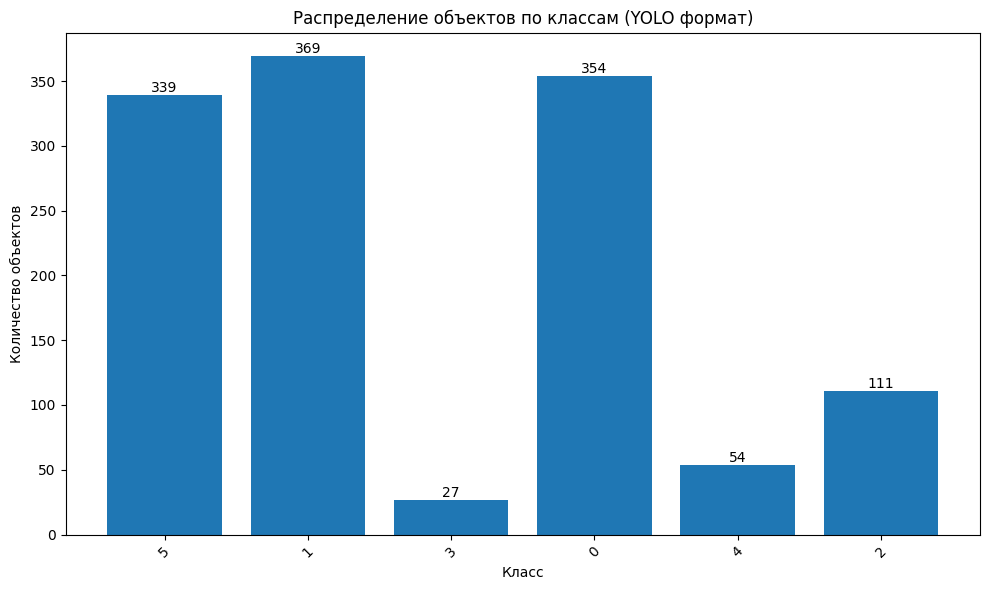

In [69]:
# Построение графика распределения объектов по классам
from collections import defaultdict
import matplotlib.pyplot as plt
import os

def count_yolo_classes(labels_dir):
    class_counts = defaultdict(int)
    total_images = 0
    total_objects = 0

    for file in os.listdir(labels_dir):
        if file.endswith('.txt'):
            total_images += 1
            with open(os.path.join(labels_dir, file), 'r') as f:
                lines = f.readlines()
                total_objects += len(lines)
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) == 5:  # Проверка на корректность строки
                        class_id = parts[0]
                        class_counts[class_id] += 1

    return total_images, total_objects, class_counts

# Указываем директорию с аннотациями
labels_dir = '/content/SpecialUniform-1/train/labels'

# Подсчёт классов
total_images, total_objects, class_counts = count_yolo_classes(labels_dir)

print(f"Всего изображений: {total_images}")
print(f"Всего объектов: {total_objects}")

# Вывод количества объектов по классам
print("Количество объектов по классам:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Построение графика
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.title('Распределение объектов по классам (YOLO формат)')
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем подписи на столбцы
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

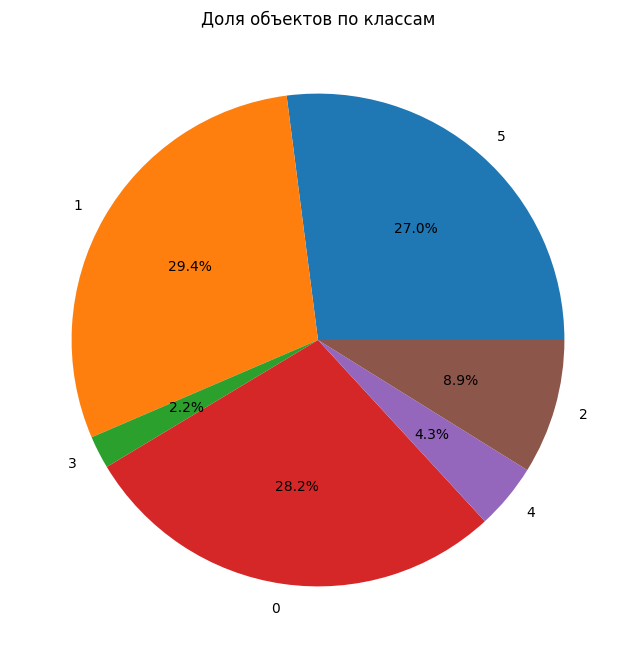

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
plt.title('Доля объектов по классам')
plt.show()

#### 6. Проверьте размеченный датасет на дублирование и пересечение, на аномальные координаты объектов и аномальные размеры объектов.

#### 7. Подготовьте обобщающий вывод по проведённому анализу качества разметки (пункты 5 и 6).

По графикам видим, что интересующих нас классов категорически не хватает для какого то более менее качественного обучения, вероятнее всего разметку придется переделывать. Во второй версии разметки буду использовать только интересующие классы нарушений, чтобы не перегружать нейросеть классами не представляющимим интереса, но представленными в гораздо большем количестве.

#### 8. Обучите модель. Метрика mAP50 должна быть не ниже 0,6 в конце обучения.

In [62]:
model = YOLO("yolov8m.pt")

# Обучение на подготовленном датасете
results = model.train(
    data=f"{dataset.location}/data.yaml",
    # freeze=10,
    epochs=100,
    imgsz=640,
    batch=16,
    name="suniform",
    pretrained=False,
    augment=False
)

New https://pypi.org/project/ultralytics/8.3.151 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.11.13 torch-2.5.1+cu118 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/SpecialUniform-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=suniform, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, au

Обучение с использованием transfer learning с заморозкой слоев дало более плохой результат чем обучение без заморозки и предобученния, но отказываться от него пока рано, так как в конечном итоге не корректным оказася датасет. Во второй версии гипотезу проверю.

In [47]:
from IPython.display import Image as Display

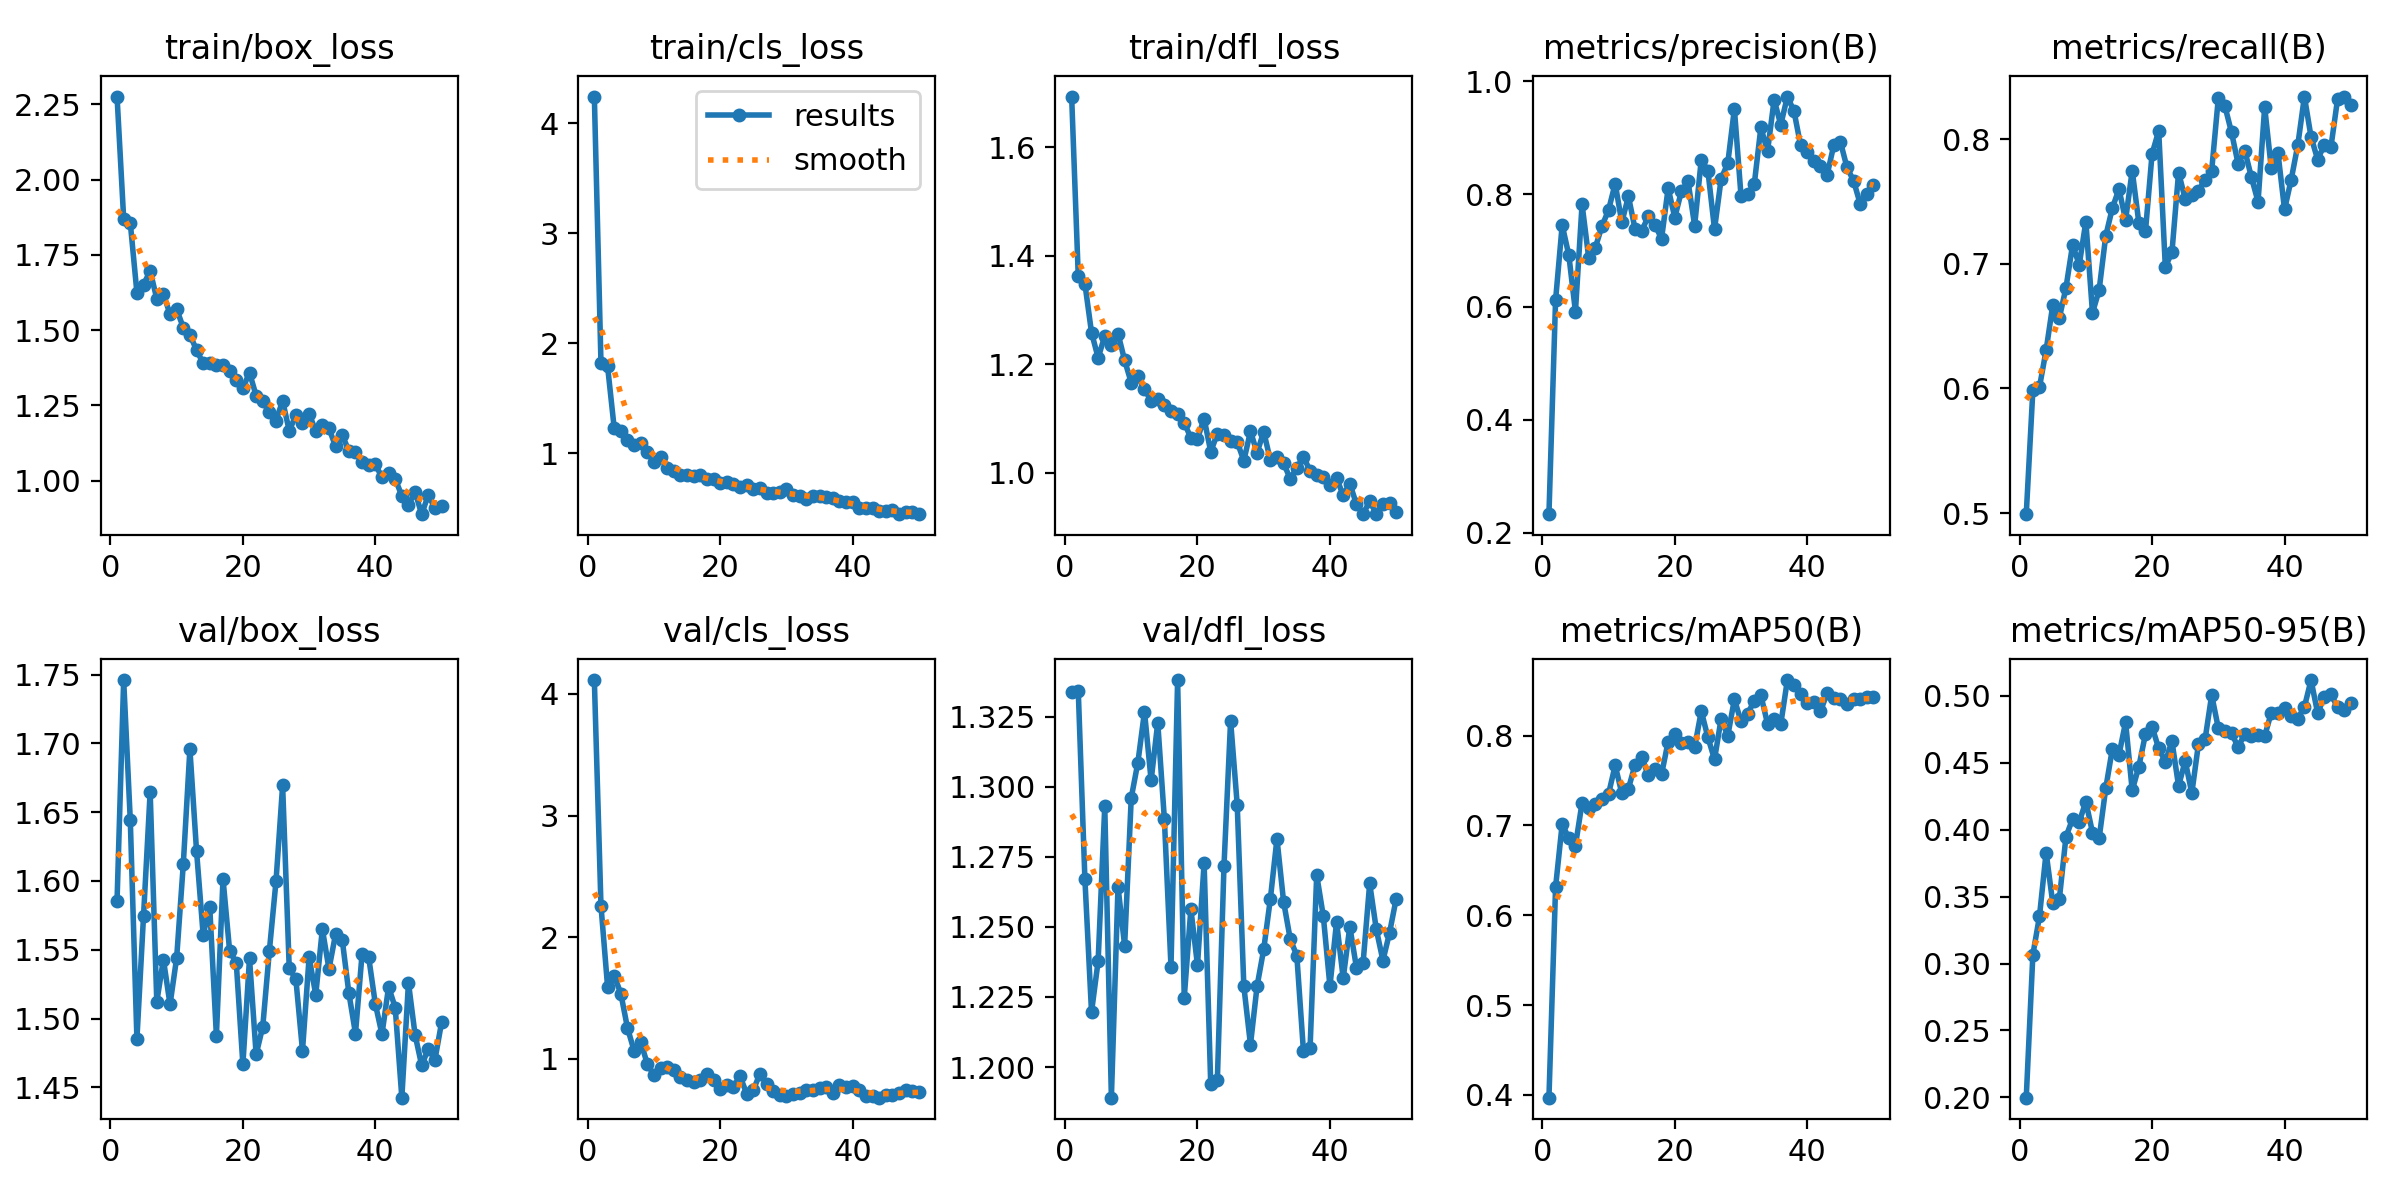

In [49]:
Display(filename='/content/SpecialUniform-1/runs/detect/suniform/results.png', width=1080)

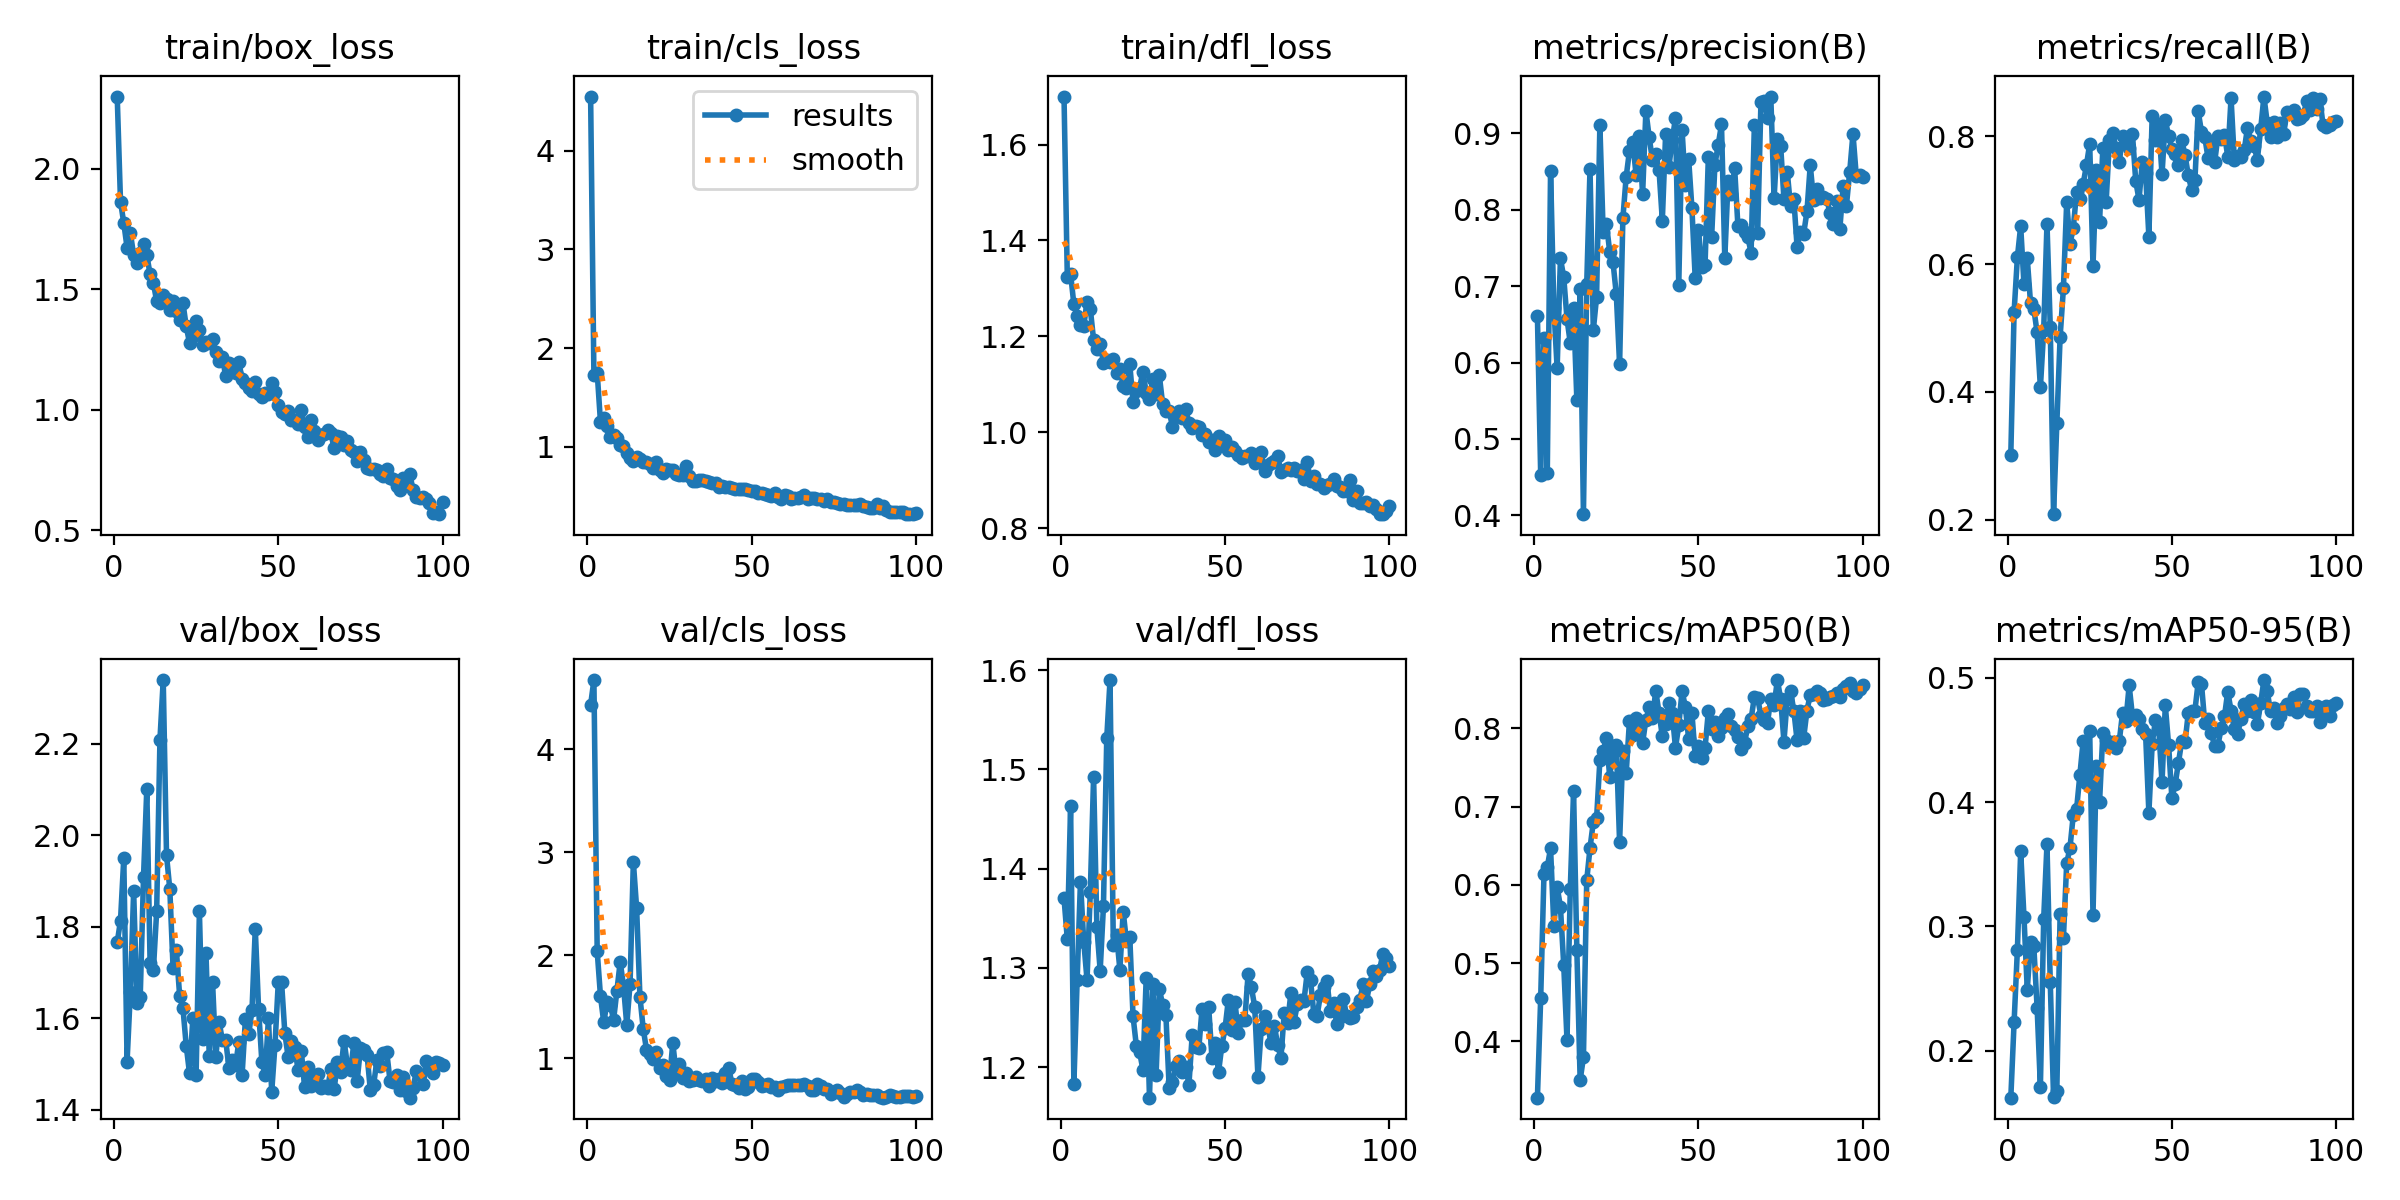

In [63]:
Display(filename='/content/SpecialUniform-1/runs/detect/suniform2/results.png', width=1080)

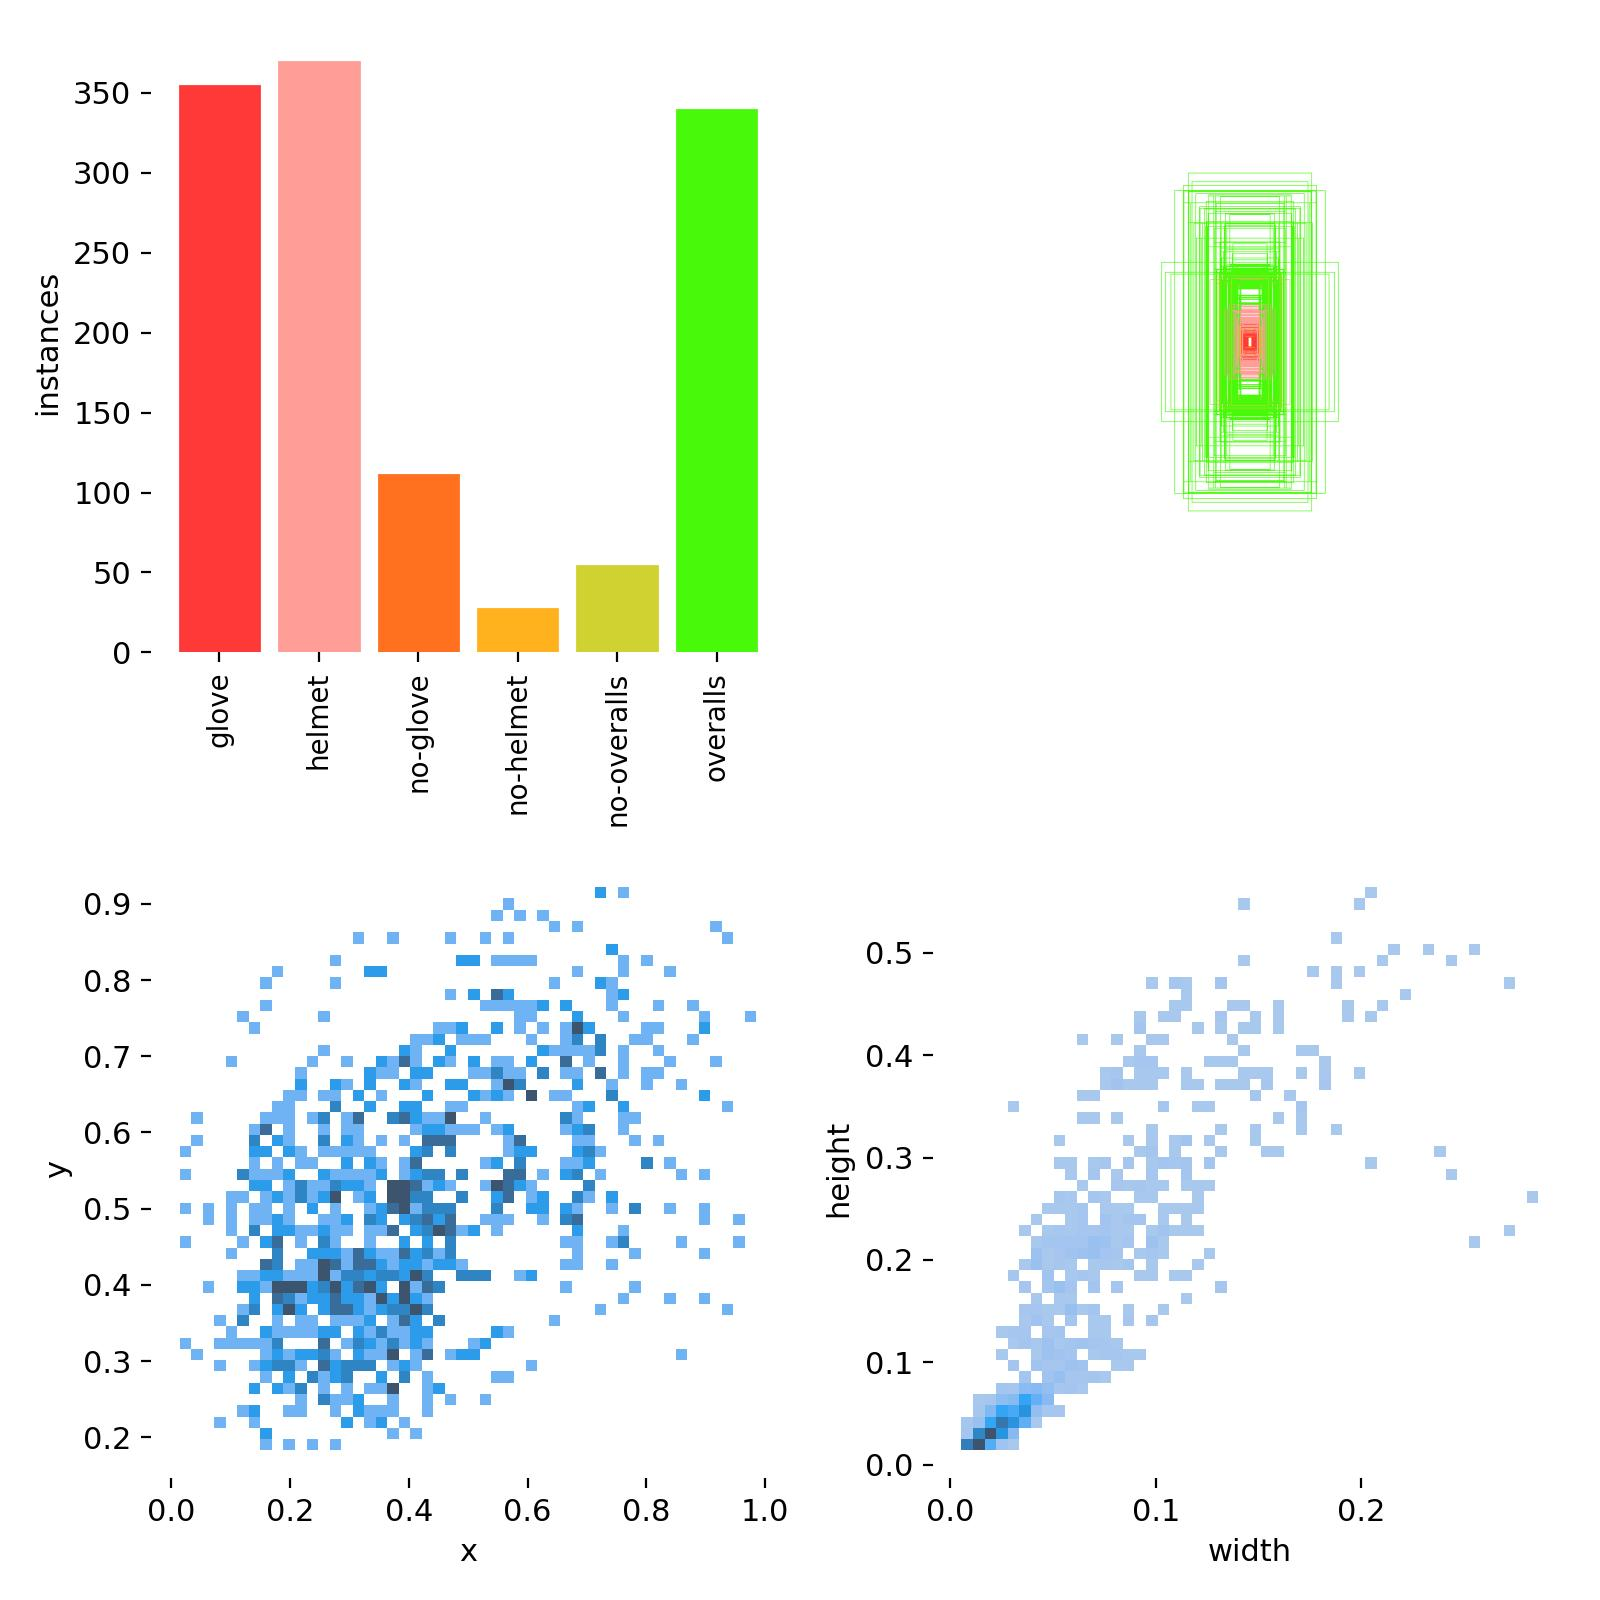

In [64]:
Display(filename='/content/SpecialUniform-1/runs/detect/suniform2/labels.jpg', width=1080)

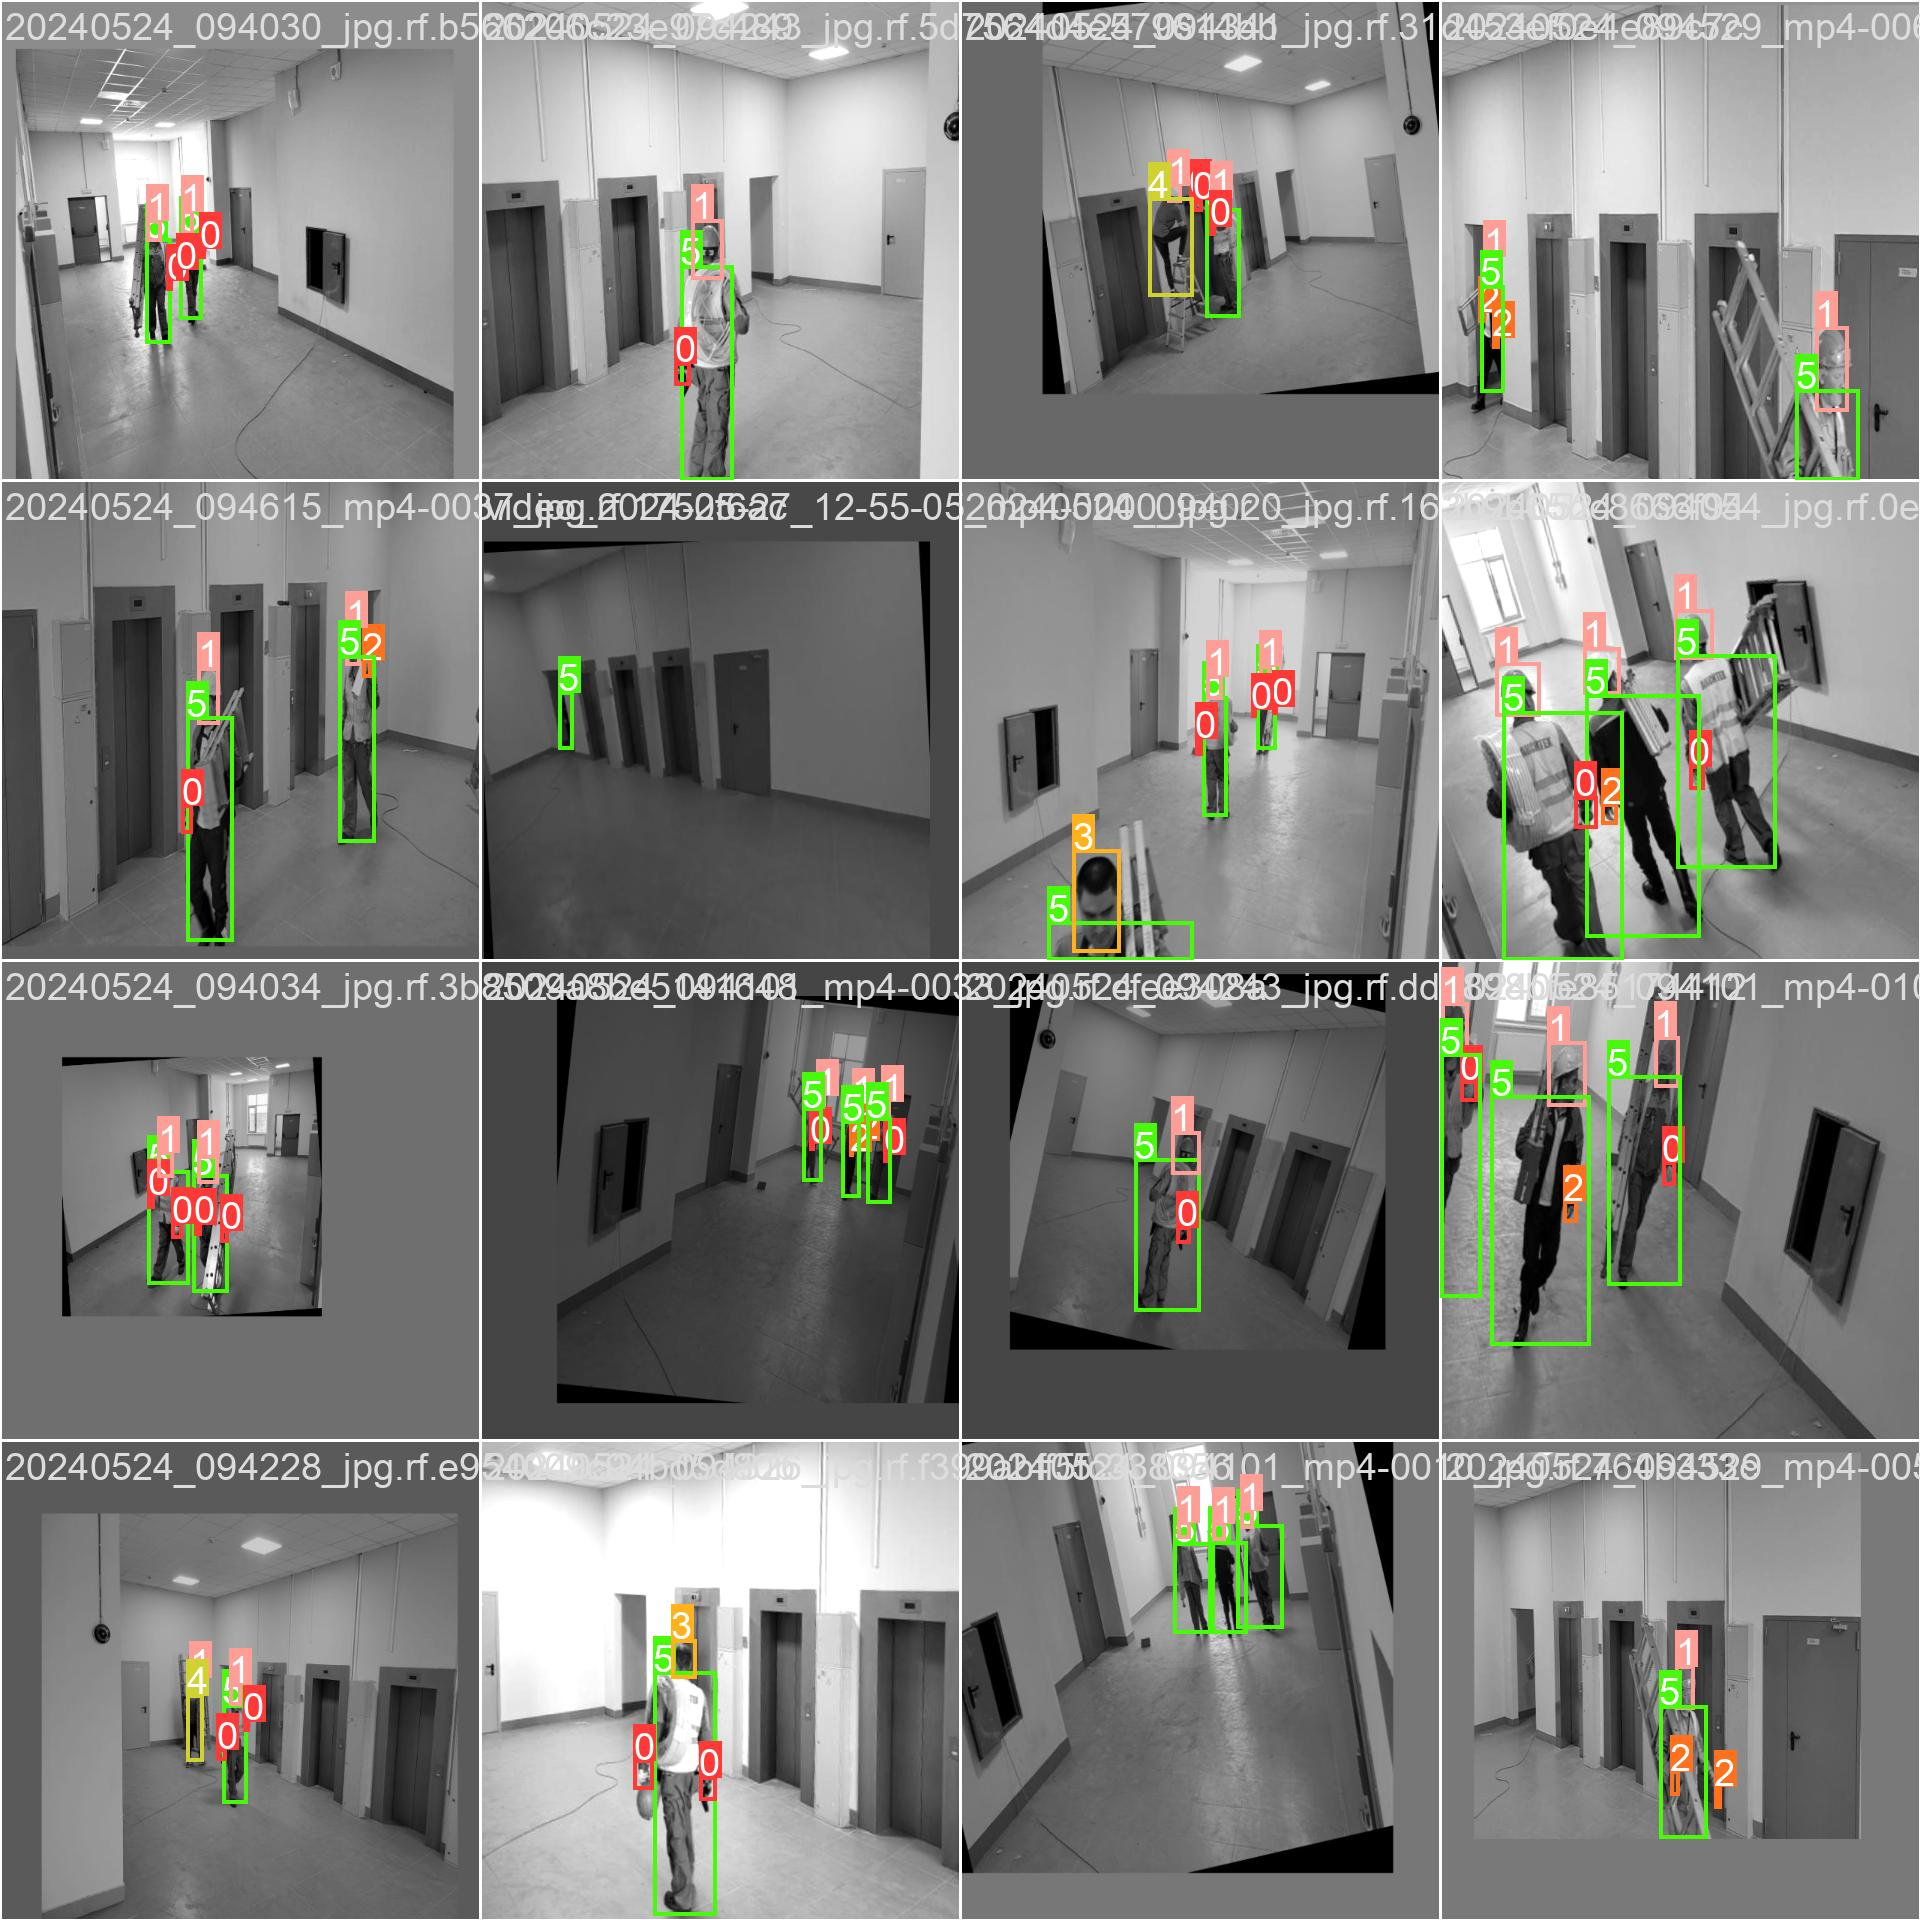

In [53]:
Display(filename='/content/SpecialUniform-1/runs/detect/suniform/train_batch560.jpg', width=1000)

Обучение и метрики нейросети с датасетом версии 2

#### 9. Подайте тестовое видео на вход модели, прикрепите три наиболее информативных кадра, где виден результат работы модели. Составьте журнал фиксации нарушений, выбрав подходящий уровень уверенности.

In [61]:
!yolo detect predict model=/content/SpecialUniform-1/runs/detect/suniform/weights/best.pt  conf=0.75 source=/content/pred save = True verbose=True

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


По результату предсказания видно, что целевые детекции отсутствуют на видео, отобранном специально для теста, не смотря на то, что на нем представлены все интересующие нас ситуации, как отсутствие шлема, так и отсутствие перчаток с униформой.

В процессе разметки не подумал о том, что в результате обработки видео файлов будет детектироваться все абсолютно, так как в разметке присутствуют классы не являющиеся нарушениями. В итоге принял решение разметку переделать, создать отдельный датасет исключительно из обьектов нужных классов.

In [67]:
# Загрузка CSV-файла
csv_path = "/content/SpecialUniform-1/runs/detect/suniform2/results.csv"
df = pd.read_csv(csv_path)

# Пример данных из data.yaml
names = ['glove', 'helmet', 'no-glove', 'no-helmet', 'no-overalls', 'overalls']

# Добавляем 'class_name' в DataFrame
if 'class_id' in df.columns:
    df['class_name'] = df['class_id'].apply(lambda x: names[int(x)])
else:
    print("В CSV нет столбца class_id")

# Выводим первые 10 строк
print("Первые 10 строк из results.csv:")
print(df.head(10))

# Выводим полную таблицу
print("\nПолная таблица:")
print(df)

В CSV нет столбца class_id
Первые 10 строк из results.csv:
                  epoch        train/box_loss        train/cls_loss  \
0                     1                2.2987                4.5511   
1                     2                1.8629                1.7314   
2                     3                1.7740                1.7515   
3                     4                1.6717                1.2492   
4                     5                1.7319                1.2880   
5                     6                1.6425                1.2132   
6                     7                1.6078                1.1003   
7                     8                1.6516                1.1194   
8                     9                1.6865                1.0832   
9                    10                1.6417                1.0123   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.7000               0.66102               0.30211   
1                

### Версия 2, датасет в котором разметил только нужные классы, а именно отсутствие СИЗ и униформы.

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="v1Z3cR3tV8wyGh4zulTm")
project = rf.workspace("project-3iyqp").project("specialuniform")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SpecialUniform-2 in yolov8:: 100%|██████████| 820/820 [00:00<00:00, 8879.86it/s]


In [7]:
import os
os.chdir('/content/SpecialUniform-2')

#### 5. Оцените корректность проведённой разметки: проведите анализ количества объектов по классам, анализ размеров объектов, анализ соотношения сторон объектов и распределения координат объектов.

In [9]:
from collections import defaultdict

In [10]:
# Подсчет изображений и объектов на них
def count_yolo_annotations(labels_dir):
    annotations = []
    total_images = 0
    total_objects = 0

    for file in os.listdir(labels_dir):
        if file.endswith('.txt'):
            total_images += 1
            with open(os.path.join(labels_dir, file), 'r') as f:
                lines = f.readlines()
                total_objects += len(lines)

    return total_images, total_objects

# Указываем директорию с аннотациями
labels_dir = '/content/SpecialUniform-2/train/labels'

# Подсчёт
total_images, total_objects = count_yolo_annotations(labels_dir)
print(f"Всего изображений: {total_images}")
print(f"Всего объектов: {total_objects}")

Всего изображений: 354
Всего объектов: 387


In [11]:
# Количество объектов по классам:
from collections import defaultdict

def count_yolo_classes(labels_dir):
    class_counts = defaultdict(int)
    total_images = 0
    total_objects = 0

    for file in os.listdir(labels_dir):
        if file.endswith('.txt'):
            total_images += 1
            with open(os.path.join(labels_dir, file), 'r') as f:
                lines = f.readlines()
                total_objects += len(lines)
                for line in lines:
                    # Разбиваем строку на элементы
                    parts = line.strip().split()
                    if len(parts) == 5:  # проверка на корректность строки
                        class_id = parts[0]
                        class_counts[class_id] += 1

    return total_images, total_objects, class_counts

# Указываем директорию с аннотациями
labels_dir = '/content/SpecialUniform-2/train/labels'

# Подсчёт
total_images, total_objects, class_counts = count_yolo_classes(labels_dir)

print(f"Всего изображений: {total_images}")
print(f"Всего объектов: {total_objects}")

print("Количество объектов по классам:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Всего изображений: 354
Всего объектов: 387
Количество объектов по классам:
0: 249
1: 51
2: 87


Всего изображений: 354
Всего объектов: 387
Количество объектов по классам:
0: 249
1: 51
2: 87


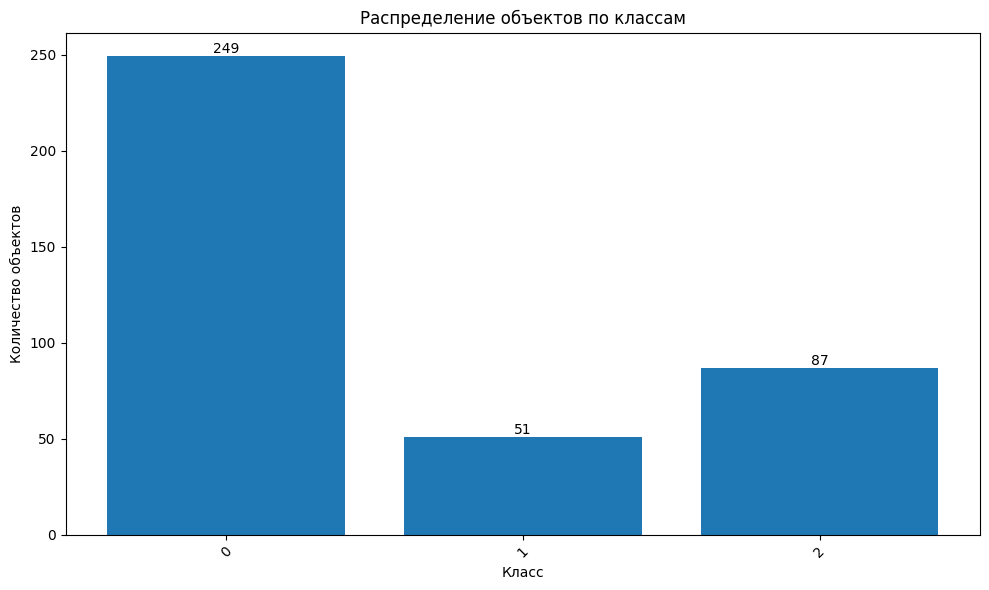

In [12]:
# Построение графика распределения объектов по классам
from collections import defaultdict
import matplotlib.pyplot as plt
import os

def count_yolo_classes(labels_dir):
    class_counts = defaultdict(int)
    total_images = 0
    total_objects = 0

    for file in os.listdir(labels_dir):
        if file.endswith('.txt'):
            total_images += 1
            with open(os.path.join(labels_dir, file), 'r') as f:
                lines = f.readlines()
                total_objects += len(lines)
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) == 5:  # Проверка на корректность строки
                        class_id = parts[0]
                        class_counts[class_id] += 1

    return total_images, total_objects, class_counts

# Указываем директорию с аннотациями
labels_dir = '/content/SpecialUniform-2/train/labels'

# Подсчёт классов
total_images, total_objects, class_counts = count_yolo_classes(labels_dir)

print(f"Всего изображений: {total_images}")
print(f"Всего объектов: {total_objects}")

# Вывод количества объектов по классам
print("Количество объектов по классам:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Построение графика
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.title('Распределение объектов по классам')
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем подписи на столбцы
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Средняя площадь объекта: 0.0068
Медианная площадь объекта: 0.0020


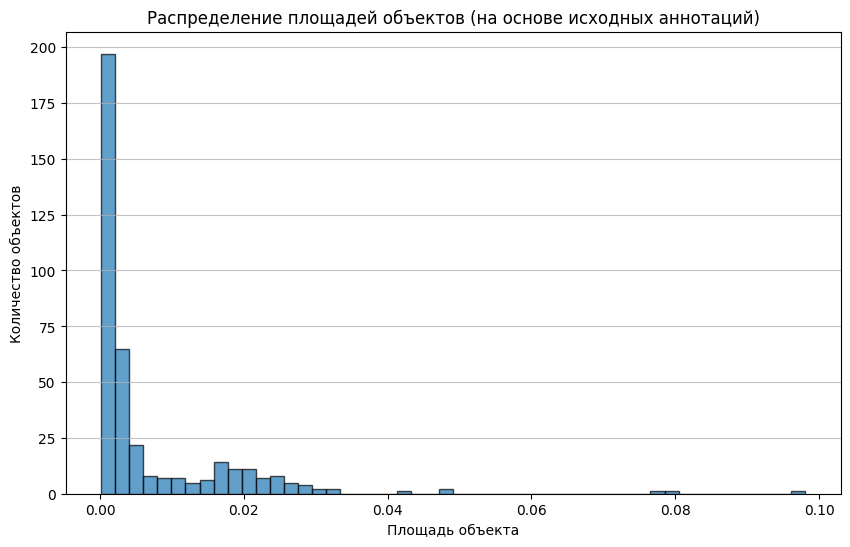

In [13]:
# Средний и медианный размер объектов:
def calculate_object_areas(labels_dir):
    object_areas = []

    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            file_path = os.path.join(labels_dir, filename)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) == 5:  # Проверка на корректность строки
                        _, x_center, y_center, width, height = map(float, parts)
                        area = width * height
                        object_areas.append(area)

    return object_areas

# Указываем директорию с исходными аннотациями (YOLO формат)
labels_dir = '/content/SpecialUniform-2/train/labels'

# Считаем площади объектов
object_areas = calculate_object_areas(labels_dir)

# Вычисляем среднюю и медианную площадь
average_area = np.mean(object_areas)
median_area = np.median(object_areas)

# Выводим результаты
print(f"Средняя площадь объекта: {average_area:.4f}")
print(f"Медианная площадь объекта: {median_area:.4f}")

# Строим график распределения площадей объектов
plt.figure(figsize=(10, 6))
plt.hist(object_areas, bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение площадей объектов (на основе исходных аннотаций)')
plt.xlabel('Площадь объекта')
plt.ylabel('Количество объектов')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### 6. Проверьте размеченный датасет на дублирование и пересечение, на аномальные координаты объектов и аномальные размеры объектов.

In [14]:
# функция проверки на дублирование и пересечения
def check_duplicates_and_overlaps(labels_dir):
    image_boxes = defaultdict(list) # Словарь: ключ - имя изображения, значение - список координат bounding box'ов

    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            file_path = os.path.join(labels_dir, filename)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) == 5:
                        class_id, x_center, y_center, width, height = map(float, parts)
                        x_center *= 640  # Предположим, что изображение 640x480
                        y_center *= 480
                        width *= 640
                        height *= 480

                        # Конвертируем в координаты bounding box
                        xmin = int(x_center - width / 2)
                        ymin = int(y_center - height / 2)
                        xmax = int(x_center + width / 2)
                        ymax = int(y_center + height / 2)

                        image_boxes[filename].append((xmin, ymin, xmax, ymax))

    # Проверка на дубликаты
    duplicate_boxes = defaultdict(list)
    for img_name, boxes in image_boxes.items():
        seen = set()
        for idx, box in enumerate(boxes):
            if box in seen:
                duplicate_boxes[img_name].append(idx)
            else:
                seen.add(box)

    # Проверка на пересечения
    overlap_boxes = defaultdict(list)
    for img_name, boxes in image_boxes.items():
        for i in range(len(boxes)):
            for j in range(i + 1, len(boxes)):
                box1 = boxes[i]
                box2 = boxes[j]

                # Проверка на пересечение
                x1_min, y1_min, x1_max, y1_max = box1
                x2_min, y2_min, x2_max, y2_max = box2

                # Вычисляем пересечение
                x_overlap = max(0, min(x1_max, x2_max) - max(x1_min, x2_min))
                y_overlap = max(0, min(y1_max, y2_max) - max(y1_min, y2_min))

                if x_overlap > 0 and y_overlap > 0:
                    area_overlap = x_overlap * y_overlap
                    area_box1 = (x1_max - x1_min) * (y1_max - y1_min)
                    area_box2 = (x2_max - x2_min) * (y2_max - y2_min)

                    if area_overlap > 0.5 * min(area_box1, area_box2):
                        overlap_boxes[img_name].append((i, j))

    return duplicate_boxes, overlap_boxes

labels_dir = '/content/SpecialUniform-2/train/labels'

# Проверяем дубликаты и пересечения
duplicates, overlaps = check_duplicates_and_overlaps(labels_dir)

print("Дублированные объекты:")
for img_name, indices in duplicates.items():
    print(f"В файле {img_name}: индексы дублированных объектов: {indices}")

print("\nПересекающиеся объекты:")
for img_name, pairs in overlaps.items():
    print(f"В файле {img_name}: пары пересекающихся объектов: {pairs}")

Дублированные объекты:

Пересекающиеся объекты:
В файле video_2024-05-27_12-54-58_mp4-0034_jpg.rf.2fdaad5cc2ded906347e188a2b0ef51e.txt: пары пересекающихся объектов: [(0, 2)]
В файле 20240524_094255_jpg.rf.03b175dab35ba77ff596528576b8f412.txt: пары пересекающихся объектов: [(0, 1), (0, 2)]
В файле video_2024-05-27_12-54-58_mp4-0034_jpg.rf.544ec99d846cf2b32485cabee41ca3da.txt: пары пересекающихся объектов: [(0, 2)]
В файле video_2024-05-27_12-54-58_mp4-0034_jpg.rf.54647a9ab9316b7a9cbf512c9a08a4a2.txt: пары пересекающихся объектов: [(0, 2)]
В файле video_2024-05-27_12-54-58_mp4-0004_jpg.rf.a5e818a07310c6dd032e6c49ef165121.txt: пары пересекающихся объектов: [(0, 2)]
В файле video_2024-05-27_12-54-58_mp4-0013_jpg.rf.fa1db3327ca48d6d6fcaaa38cd966081.txt: пары пересекающихся объектов: [(0, 2), (1, 2)]
В файле video_2024-05-27_12-54-58_mp4-0004_jpg.rf.0445b89f0f24c07d5b998eb993aadc44.txt: пары пересекающихся объектов: [(0, 2), (1, 2)]
В файле video_2024-05-27_12-54-58_mp4-0013_jpg.rf.12caf3fb

In [15]:
# аномальные координаты объектов и аномальные размеры объектов
def check_anomalies(labels_dir):
    anomalies = []

    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            file_path = os.path.join(labels_dir, filename)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                for idx, line in enumerate(lines):
                    parts = line.strip().split()
                    if len(parts) != 5:
                        anomalies.append({
                            'filename': filename,
                            'line': idx + 1,
                            'error': 'Некорректная строка: не 5 элементов'
                        })
                        continue

                    try:
                        class_id, x_center, y_center, width, height = map(float, parts)
                    except ValueError:
                        anomalies.append({
                            'filename': filename,
                            'line': idx + 1,
                            'error': 'Некорректные значения: не числа'
                        })
                        continue

                    # Проверка на аномалии
                    if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 < width <= 1 and 0 < height <= 1):
                        anomalies.append({
                            'filename': filename,
                            'line': idx + 1,
                            'error': 'Координаты вне допустимого диапазона'
                        })

                    # Проверка на аномально маленький/большой объект
                    if width < 0.01 or height < 0.01:
                        anomalies.append({
                            'filename': filename,
                            'line': idx + 1,
                            'error': 'Объект слишком маленький'
                        })

                    if width > 0.9 or height > 0.9:
                        anomalies.append({
                            'filename': filename,
                            'line': idx + 1,
                            'error': 'Объект занимает почти всё изображение'
                        })

    return anomalies

# Указываем директорию с аннотациями
labels_dir = '/content/SpecialUniform-2/train/labels'

# Проверяем на аномалии
anomalies = check_anomalies(labels_dir)

# Вывод результатов
if anomalies:
    print("Найдены аномалии:")
    for a in anomalies:
        print(f"{a['filename']} | Строка {a['line']}: {a['error']}")
else:
    print("Аномалий не найдено.")

Найдены аномалии:
20240524_094255_jpg.rf.03b175dab35ba77ff596528576b8f412.txt | Строка 3: Объект слишком маленький
20240524_094255_jpg.rf.c12da79c23da7509333424b758cae97e.txt | Строка 3: Объект слишком маленький
20240524_094255_jpg.rf.6603f52ff80fd6693d0179a9bed06329.txt | Строка 3: Объект слишком маленький


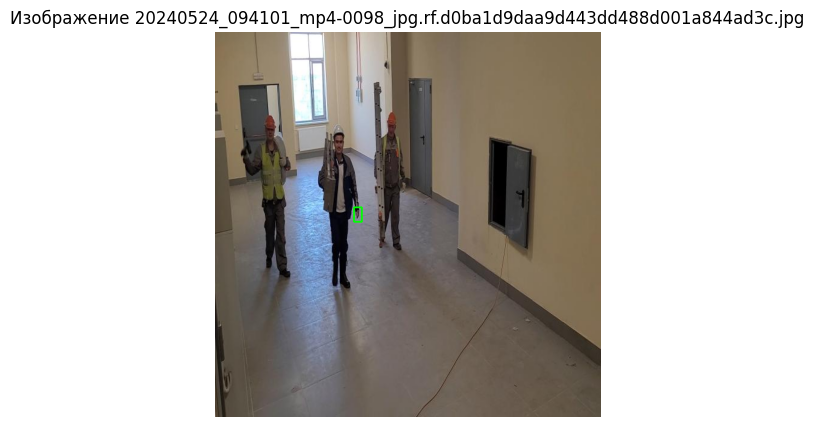

In [16]:
# функция отображения пары изображений с аннотацией
# Путь к изображениям и аннотациям
from PIL import Image
images_dir = '/content/SpecialUniform-2/train/images'
labels_dir = '/content/SpecialUniform-2/train/labels'

# Список файлов изображений
image_fns = os.listdir(images_dir)
label_fns = os.listdir(labels_dir)

# Функция для загрузки аннотаций
def load_yolo_labels(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            class_id, x_center, y_center, width, height = map(float, parts)
            boxes.append((class_id, x_center, y_center, width, height))
    return boxes

# Вывод пары изображений с аннотациями
num_images_to_show = 1  # сколько изображений показать

for i in range(num_images_to_show):
    img_fn = image_fns[i]
    label_fn = img_fn.replace('.jpg', '.txt')

    img_path = os.path.join(images_dir, img_fn)
    label_path = os.path.join(labels_dir, label_fn)

    # Загружаем изображение
    image = Image.open(img_path).convert("RGB")
    image_np = np.array(image)

    # Загружаем аннотации
    boxes = load_yolo_labels(label_path)

    # Рисуем bounding box'ы на изображении
    for box in boxes:
        class_id, x_center, y_center, width, height = box

        # Конвертируем относительные координаты в абсолютные
        h, w = image_np.shape[:2]
        x_center *= w
        y_center *= h
        width *= w
        height *= h

        # Вычисляем xmin, ymin, xmax, ymax
        xmin = int(x_center - width / 2)
        ymin = int(y_center - height / 2)
        xmax = int(x_center + width / 2)
        ymax = int(y_center + height / 2)

        # Рисуем прямоугольник
        cv2.rectangle(image_np, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Отображаем изображение с аннотациями
    plt.figure(figsize=(10, 5))
    plt.imshow(image_np)
    plt.title(f"Изображение {img_fn}")
    plt.axis('off')
    plt.show()

#### 7. Подготовьте обобщающий вывод по проведённому анализу качества разметки (пункты 5 и 6).

По графикам видим, что соотношение интересующих нас классов стало более качественное. Во этой версии разметки использованы только интересующие классы нарушений. Судя по обнаруженным отклонениям в виде дублей и слишком маленьких обьектов, в датасете необходимо корректировать разметку. Так же налицо дисбаланс классов, в нашем случае рук без перчаток оказалось сильно больше чем другиз классов, даже без учета того что руки у человека две. В конечном итоге дисбаланс может привести к переобучению на экземплярах именно рук.

#### 8. Обучите модель. Метрика mAP50 должна быть не ниже 0,6 в конце обучения.

Обучение и метрики нейросети с датасетом версии 2

In [17]:
model = YOLO("yolov8m.pt")
# в первом эксперименте по метрикам обучения предположительно версия
# без предобучения и заморозки дала более качественный результат, что будем проверять в версии 2
# Обучение на подготовленном датасете
results = model.train(
    data=f"{dataset.location}/data.yaml",
    freeze=10,
    epochs=100,
    imgsz=640,
    batch=16,
    name="suniform",
    pretrained=True,
    augment=False
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 139MB/s]
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
New https://pypi.org/project/ultralytics/8.3.151 available 😃 Update with 'pip install -U ult

От обучения с использованием transfer learning с заморозкой слоев отказался так как давало более плохой результат чем обучение без заморозки и предобученния. Возможно в конечном итоге проблема все таки в датасете, но в данном конкретном случае так получилось более качественное обучение.

In [18]:
from IPython.display import Image as Display

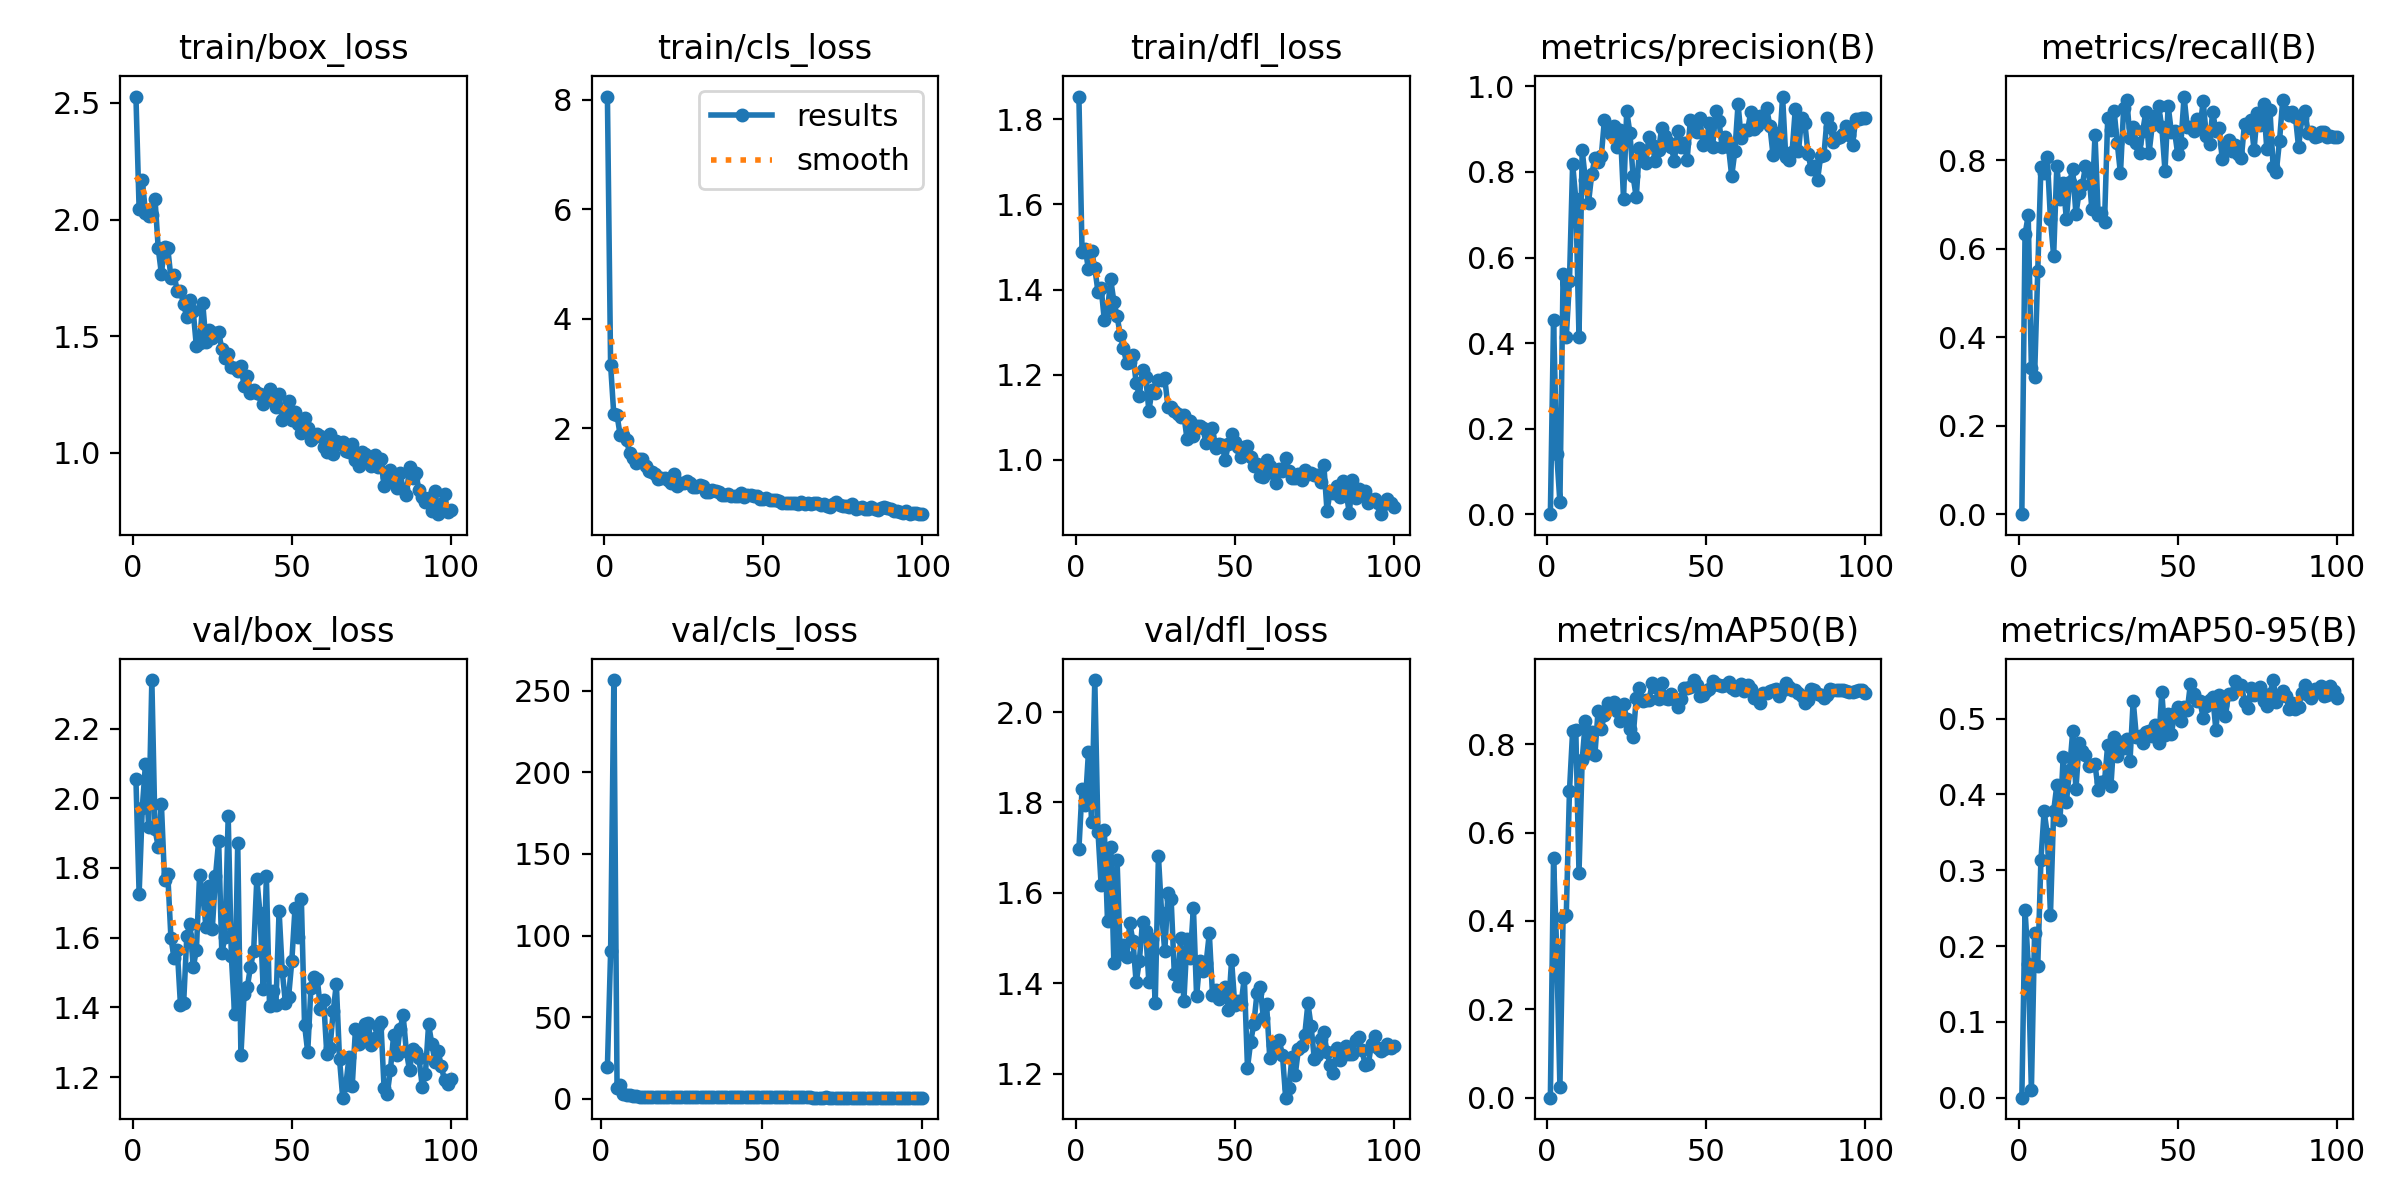

In [19]:
Display(filename='/content/SpecialUniform-2/runs/detect/suniform/results.png', width=1080)

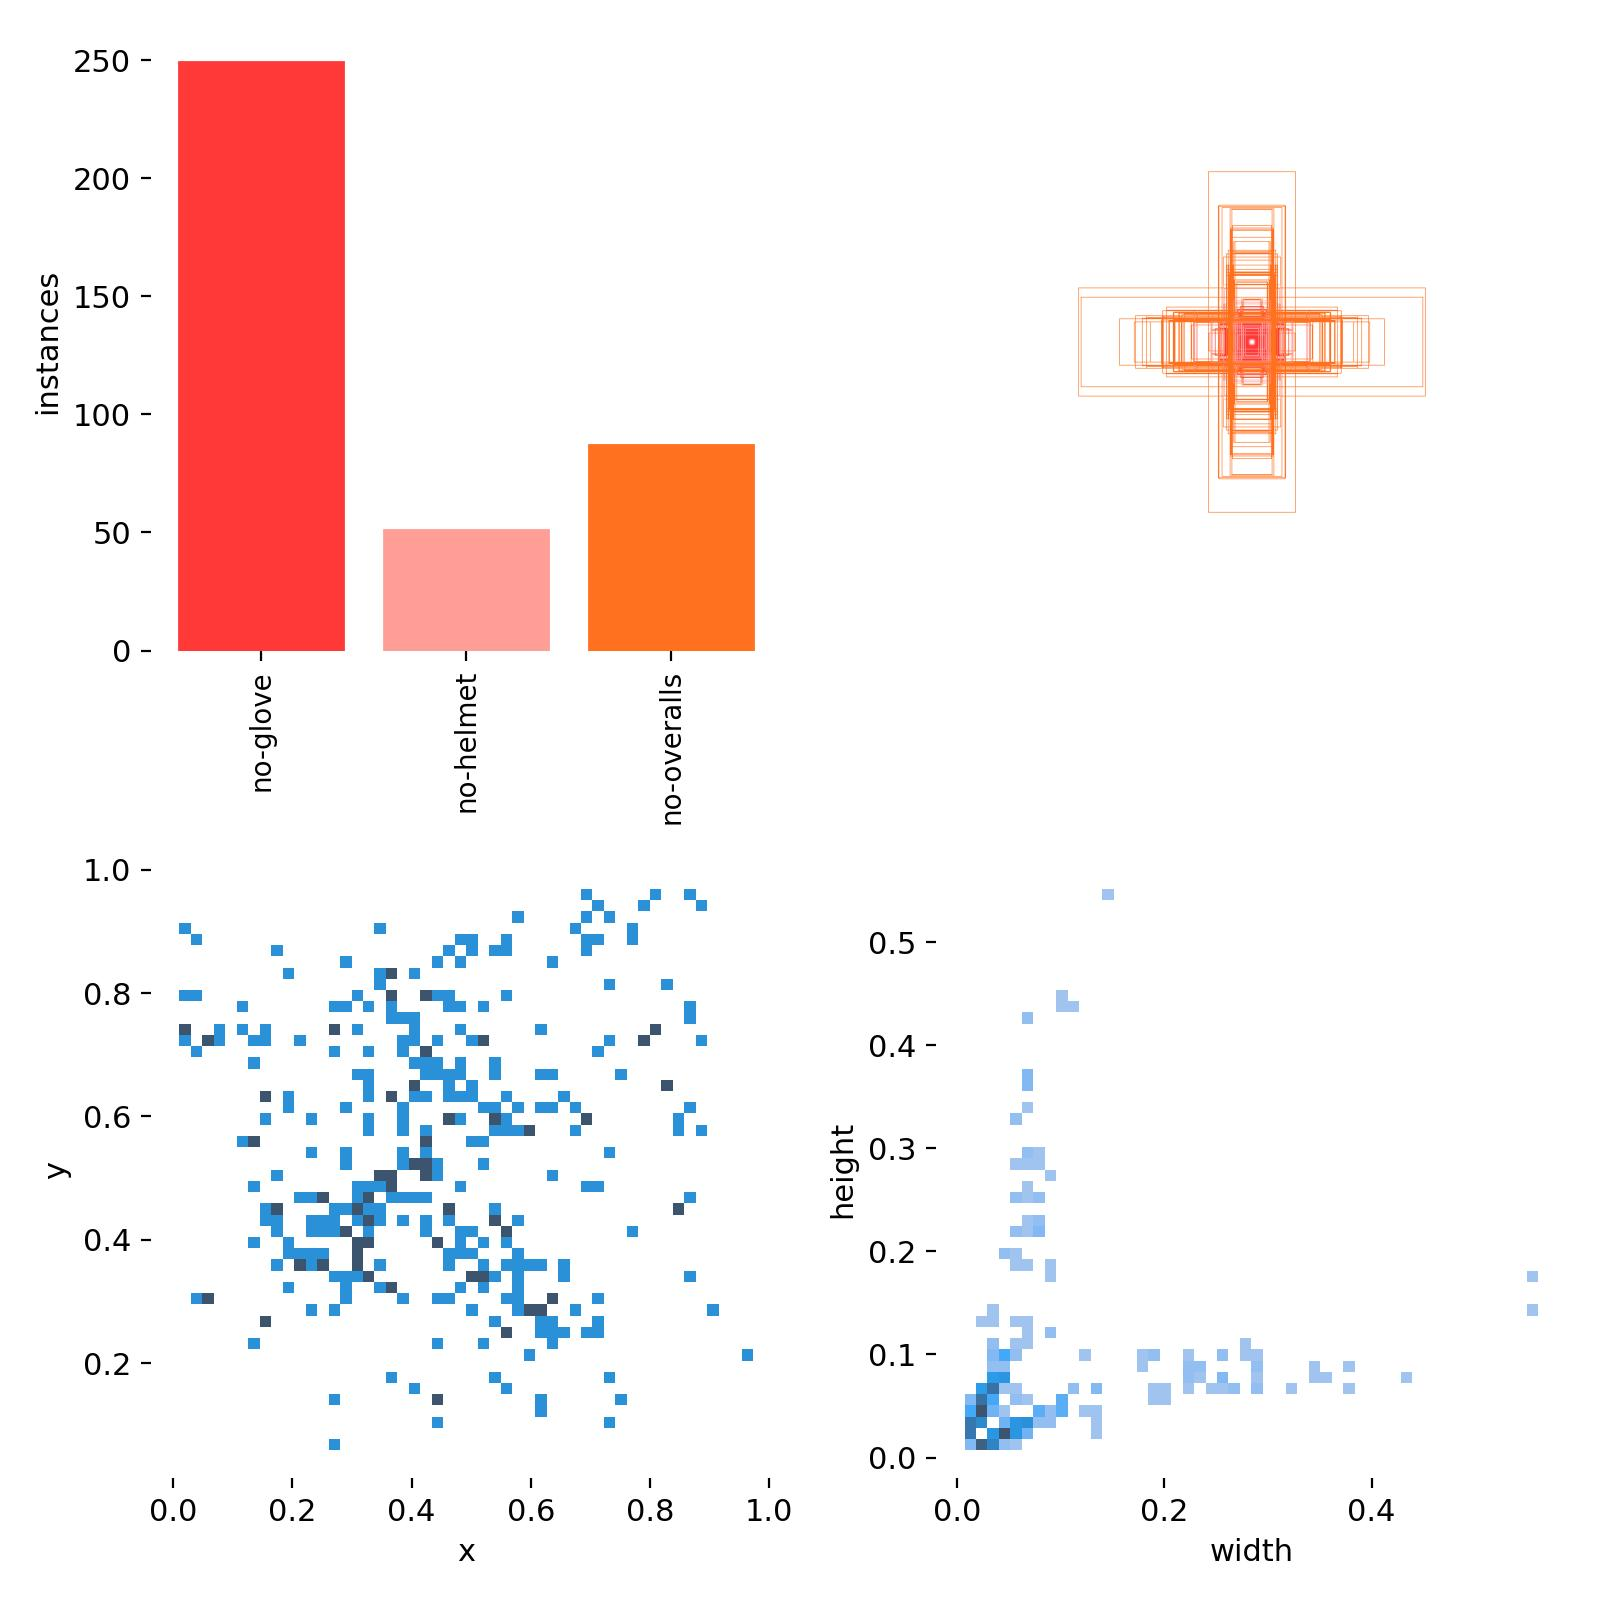

In [20]:
Display(filename='/content/SpecialUniform-2/runs/detect/suniform/labels.jpg', width=1080)

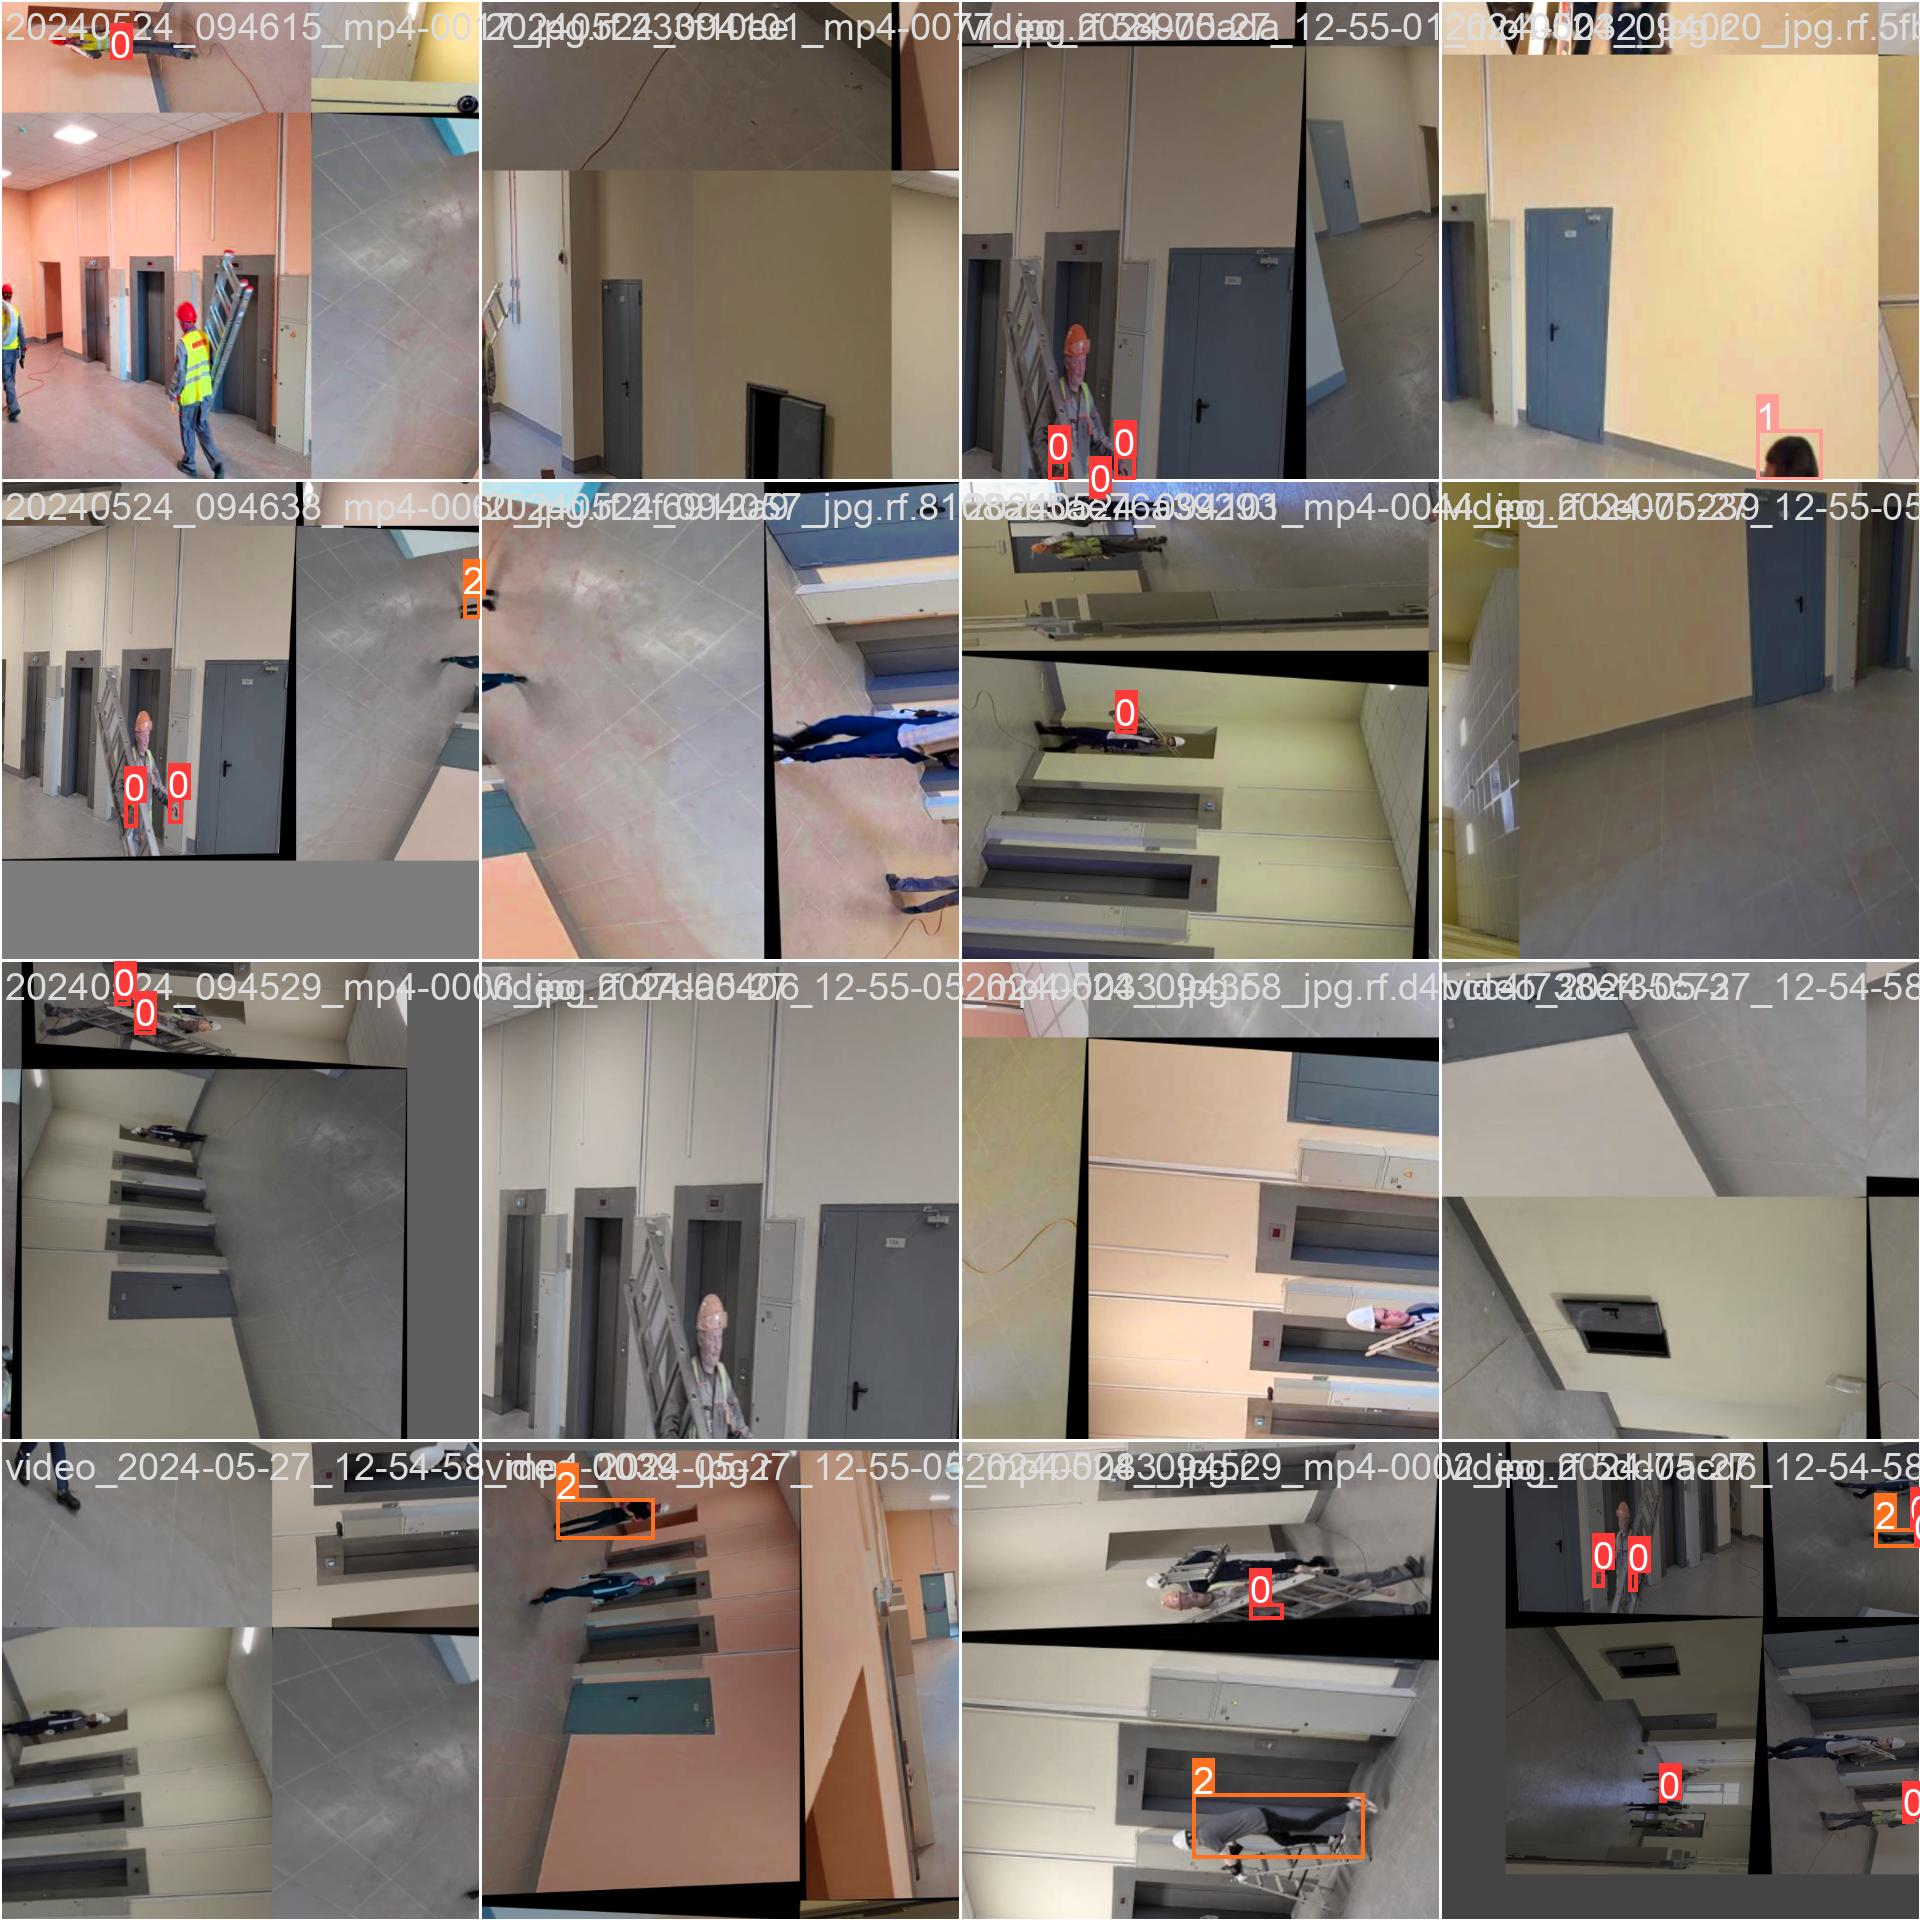

In [21]:
Display(filename='/content/SpecialUniform-2/runs/detect/suniform/train_batch2.jpg', width=1000)

#### 9. Подайте тестовое видео на вход модели, прикрепите три наиболее информативных кадра, где виден результат работы модели. Составьте журнал фиксации нарушений, выбрав подходящий уровень уверенности.

In [22]:
!yolo detect predict model=/content/SpecialUniform-2/runs/detect/suniform/weights/best.pt  conf=0.75 source=/content/pred save = True save_txt=True verbose=True

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


далее собираем все детекции в один файл чтобы былол удобнее обрабатывать.

In [23]:
import glob
from datetime import datetime
# соберем данные обо всех детекциях в один файл
# Путь к директории с результатами детекции
results_dir = "/content/SpecialUniform-2/runs/detect/predict"

# Путь к файлам с аннотациями (YOLO формат)
labels_dir = os.path.join(results_dir, "labels")

# Формируем путь к выходному файлу
output_log_path = os.path.join(results_dir, f"detected_violations_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")

# Список файлов с детекциями
label_files = glob.glob(os.path.join(labels_dir, "*.txt"))

# Открываем файл для записи
with open(output_log_path, 'w') as log_file:
    for label_file in label_files:
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)


                    # no-glove = 2, no-helmet = 3, no-overalls = 4
                    if class_id in [2, 3, 4]:
                        log_file.write(f"{label_file} | {line}")

чтобы было более наглядно для человеческого восприятия, переводим детекции в формат с названиями

In [27]:
import yaml

# Путь к директории с результатами детекций
predictions_dir = "/content/SpecialUniform-2/runs/detect/predict/labels"

# Чтение списка классов из data.yaml
with open("/content/SpecialUniform-2/data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)

names = data_yaml["names"]
print(names)  # ['no-glove', 'no-helmet', 'no-overalls']

# Создаем пустой список для хранения данных
data = []

# Проходим по всем файлам с детекциями
for filename in os.listdir(predictions_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(predictions_dir, filename)

        # Извлекаем дату и время из имени файла
        timestamp = filename.split("_")[1]  # Предполагается, что имя файла содержит дату/время
        date_time = datetime.strptime(timestamp, "%Y-%m-%d")

        with open(file_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)

                    # Преобразуем метку класса в название
                    class_name = names[int(class_id)]

                    # Добавляем данные в список
                    data.append({
                        "Файл": filename,
                        "Дата/Время": date_time.strftime("%Y-%m-%d %H:%M:%S"),
                        "Класс": class_name,
                        "x_center": x_center,
                        "y_center": y_center,
                        "width": width,
                        "height": height
                    })

# Создаем DataFrame
df = pd.DataFrame(data)

# Сохраняем в файл
output_file = f"detected_violations_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt"
df.to_csv(output_file, sep="\t", index=False)

# Выводим на экран
print(df)

['no-glove', 'no-helmet', 'no-overalls']
                                  Файл           Дата/Время        Класс  \
0    video_2024-05-27_12-54-54_248.txt  2024-05-27 00:00:00  no-overalls   
1    video_2024-05-27_12-54-54_155.txt  2024-05-27 00:00:00  no-overalls   
2    video_2024-05-27_12-54-54_212.txt  2024-05-27 00:00:00  no-overalls   
3     video_2024-05-27_12-54-54_27.txt  2024-05-27 00:00:00  no-overalls   
4    video_2024-05-27_12-54-54_117.txt  2024-05-27 00:00:00  no-overalls   
..                                 ...                  ...          ...   
184  video_2024-05-27_12-54-54_200.txt  2024-05-27 00:00:00  no-overalls   
185  video_2024-05-27_12-54-54_229.txt  2024-05-27 00:00:00  no-overalls   
186  video_2024-05-27_12-54-54_240.txt  2024-05-27 00:00:00  no-overalls   
187  video_2024-05-27_12-54-54_135.txt  2024-05-27 00:00:00  no-overalls   
188  video_2024-05-27_12-54-54_253.txt  2024-05-27 00:00:00  no-overalls   

     x_center  y_center     width    height  


В этой версии разметки принято более верное решение, что видно по результатам работы нейросети. Однако на тестовом видео нейросеть не детектирует руки без перчаток, а так же голову без шлема. Выведя журнал со всеми обнаруженными детекциями нарушений и видим, что среди детекций нет классов явно представленных на видео:
- отсутствие шлема
- отсутствие перчаток

По результату предсказания видно, что нейросеть не достаточно качественно обучилась на размеченном датасете, вероятнее всего причина в дисбалансе классов и недостаточном обьеме трейна.

In [29]:
# Поиск всех видеофайлов в директории
from IPython.display import display, HTML
video_files = glob.glob("/content/SpecialUniform-2/runs/detect/predict/*.avi")

if video_files:
    video_path = video_files[0]
    video_html = f"""
    <video width="640" height="480" controls>
        <source src="{video_path}" type="video/mp4">
    </video>
    """
    display(HTML(video_html))
else:
    print("Видеофайл не найден.")
# в колабе не работает, но локально в vscode видео показывается

## 10. Сделайте вывод, насколько грамотно вы выполнили разметку и нет ли претензий к полученным данным от заказчика. Сделайте также общий вывод по работе, в котором опишите выбор типа и параметров нейронной сети детектора, анализ датасета, количество эпох, отведённых на обучение, способ аугментации, итоговую отработку модели на тестовом видео и прочее.

В процессе выполнения задачи была проведена ручная аннотация изображений с использованием сервиса Roboflow. После завершения этапа обучения модели YOLOv8m была достигнута mAP = 0.85, но по результатам проверки с помощью тестового видео, можно сделать выводы, что требуется более качественная проработка обучающего датасета, а так же контроль баланса классов. На количестве эпох менее 100 по графикам метрик было видно, что нейросеть еще активго обучается и улучшает результат, но при установке более 100 эпох изменение метрик значительно замедляется, практически не приводя к улучшению, по этой причине остановился на 100 эпохах. При размере batch более 32 обучание идет быстрее, но качество заметно падает. Аугментации в параметрах модели отключены, так как приводили к значительному искажению обучающих данных, после чего модель, например, начинала видеть руки там где на изображении лестница, поэтому оставил только аугментации выполненные в сервисе roboflow. На тестовом видео модель отрабатывает не все классы, отдавая предпочтение выделению отсутствия униформы, есть гипотеза, что при разметке датасета были чрезмерно большие рамки bounding box'ов, перекрывающие все остальное.

Итоговый вывод - для дальнейшего улучшения работы модели требуетя работа с обучающим набором данных, а именно:
* более точная (скрупулезная) разметка,
* контроль баланса представленных классов,
* больше данных для обучения, возможно при кадрировании видео использовать более высокий FPS, чтобы получилось значительно больше обучающих данных.

Обучение с использованием transfer learning и заморозкой слоев в итоге показало таки более качетвенный результат, но для его достижения необходимо балансировать классы.